In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import  keras
from keras.preprocessing.image import load_img,img_to_array,array_to_img
from os import listdir

In [3]:
X=[]
Y=[]

for directory in listdir('aug/'):
    for filename in listdir('aug/'+ directory):
        img = load_img('aug/'+directory+'/'+filename)
        img=img.resize((240,240))
        img=img_to_array(img)/255
        X.append(img)
        if directory=='no':
            Y.append(0)
        else :
            Y.append(1)

np.array(X).shape

np.array(Y).shape

(2271,)

In [4]:
print(np.array(X).shape,np.array(Y).shape,sep="\n")

(2271, 240, 240, 3)
(2271,)


In [5]:
train_X=np.array(X)
train_Y=np.array(Y).reshape((2271,1))

In [6]:
train_X.shape

(2271, 240, 240, 3)

In [7]:
train_Y.shape

(2271, 1)

In [8]:
from sklearn.utils import shuffle

In [9]:
train_X,train_Y=shuffle(train_X,train_Y)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val, y_train, y_val = train_test_split(train_X, train_Y, test_size=0.3, random_state=42)

In [12]:
X_val,X_test,y_val,y_test=train_test_split(X_val,y_val,test_size=.5,random_state=42)

In [13]:
X_val.shape

(341, 240, 240, 3)

In [14]:
X_test.shape

(341, 240, 240, 3)

In [15]:
X_train.shape

(1589, 240, 240, 3)

In [16]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten,ZeroPadding2D

In [33]:
cnn = Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=65,activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x=X_train,y=y_train, validation_data = (X_val,y_val), epochs = 5)

Train on 1589 samples, validate on 341 samples
Epoch 1/5
1589/1589 [==============================] - 11s 7ms/sample - loss: 0.6661 - accuracy: 0.6860 - val_loss: 0.5411 - val_accuracy: 0.7331
Epoch 2/5
1589/1589 [==============================] - 10s 7ms/sample - loss: 0.4515 - accuracy: 0.7904 - val_loss: 0.5028 - val_accuracy: 0.7683
Epoch 3/5
1589/1589 [==============================] - 10s 6ms/sample - loss: 0.3525 - accuracy: 0.8502 - val_loss: 0.4800 - val_accuracy: 0.7801
Epoch 4/5
1589/1589 [==============================] - 10s 6ms/sample - loss: 0.2998 - accuracy: 0.8691 - val_loss: 0.5003 - val_accuracy: 0.7654
Epoch 5/5
1589/1589 [==============================] - 10s 7ms/sample - loss: 0.2166 - accuracy: 0.9201 - val_loss: 0.5351 - val_accuracy: 0.7595


In [31]:
model=Sequential()

In [32]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[240, 240, 3]))
model.add(ZeroPadding2D((2, 2)))
model.add(MaxPool2D(pool_size=(4, 4),strides=2))
model.add(MaxPool2D(pool_size=(4,4)))


In [33]:
model.add(Flatten())

In [34]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32,verbose=1)

Train on 1589 samples, validate on 341 samples
Epoch 1/10
1589/1589 [==============================] - 53s 33ms/step - loss: 0.6937 - accuracy: 0.6155 - val_loss: 0.5567 - val_accuracy: 0.7449
Epoch 2/10
1589/1589 [==============================] - 51s 32ms/step - loss: 0.5693 - accuracy: 0.7048 - val_loss: 0.5372 - val_accuracy: 0.7713
Epoch 3/10
1589/1589 [==============================] - 51s 32ms/step - loss: 0.5331 - accuracy: 0.7565 - val_loss: 0.4674 - val_accuracy: 0.8094
Epoch 4/10
1589/1589 [==============================] - 51s 32ms/step - loss: 0.4794 - accuracy: 0.7867 - val_loss: 0.5033 - val_accuracy: 0.7742
Epoch 5/10
1589/1589 [==============================] - 52s 33ms/step - loss: 0.4553 - accuracy: 0.7930 - val_loss: 0.4039 - val_accuracy: 0.8416
Epoch 6/10
1589/1589 [==============================] - 51s 32ms/step - loss: 0.3767 - accuracy: 0.8345 - val_loss: 0.3820 - val_accuracy: 0.8504
Epoch 7/10
1589/1589 [==============================] - 51s 32ms/step - loss:

In [37]:
loss=pd.DataFrame(model.history.history)

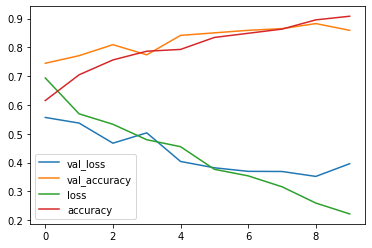

In [38]:
loss.plot()

In [39]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=3,batch_size=32,verbose=1)

Train on 1589 samples, validate on 341 samples
Epoch 1/3
1589/1589 [==============================] - 53s 33ms/step - loss: 0.2262 - accuracy: 0.9132 - val_loss: 0.3478 - val_accuracy: 0.8856
Epoch 2/3
1589/1589 [==============================] - 53s 34ms/step - loss: 0.1938 - accuracy: 0.9232 - val_loss: 0.3762 - val_accuracy: 0.8768
Epoch 3/3
1589/1589 [==============================] - 53s 33ms/step - loss: 0.1546 - accuracy: 0.9383 - val_loss: 0.4410 - val_accuracy: 0.8622


In [40]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=10,batch_size=32,verbose=1)

Train on 1589 samples, validate on 341 samples
Epoch 1/10
1589/1589 [==============================] - 53s 33ms/step - loss: 0.1378 - accuracy: 0.9440 - val_loss: 0.4066 - val_accuracy: 0.8974
Epoch 2/10
1589/1589 [==============================] - 53s 34ms/step - loss: 0.1368 - accuracy: 0.9459 - val_loss: 0.4303 - val_accuracy: 0.8915
Epoch 3/10
1589/1589 [==============================] - 52s 33ms/step - loss: 0.1265 - accuracy: 0.9541 - val_loss: 0.3765 - val_accuracy: 0.8944
Epoch 4/10
1589/1589 [==============================] - 52s 33ms/step - loss: 0.1184 - accuracy: 0.9585 - val_loss: 0.4919 - val_accuracy: 0.8944
Epoch 5/10
1589/1589 [==============================] - 56s 35ms/step - loss: 0.0878 - accuracy: 0.9622 - val_loss: 0.5339 - val_accuracy: 0.8856
Epoch 6/10
1589/1589 [==============================] - 52s 33ms/step - loss: 0.1025 - accuracy: 0.9610 - val_loss: 0.4976 - val_accuracy: 0.8856
Epoch 7/10
1589/1589 [==============================] - 51s 32ms/step - loss:

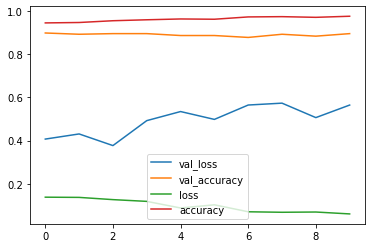

In [41]:
loss=pd.DataFrame(model.history.history)

loss.plot()